In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df_bookings=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\fact_bookings.csv')
df_hotels=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\dim_hotels.csv')
df_rooms=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\dim_rooms.csv')
df_aggregated_bookings=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\fact_aggregated_bookings.csv')
df_date=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\dim_date.csv')
#Another method of adding that column is:
df_aggregated_bookings['occ_pct'] = df_aggregated_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_aggregated_bookings['occ_pct'] = df_aggregated_bookings['occ_pct'].apply(lambda x: round(x*100, 2))


In [8]:
#The business questions asked in the scenarios are called : ad-hoc questions:

#QUESTION-1:WHAT IS THE AVERAGE OCCUPANCY RATE PER ROOM TYPE?

#STEP-1--
df_aggregated_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [13]:
#STEP-2--
#But RT1,RT2.. We don't know what kind of rooms are these,so, we can merge these rooms with rooms DataFrame to show the corresponding room class.
#There is no common column between the two DataFrames,in such cases left_on='room_category',right_on='room_id' type of join still work.
df=pd.merge(df_aggregated_bookings,df_rooms,left_on='room_category',right_on='room_id')
df.tail(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9199,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential


In [11]:
#STEP-3--
#Get average occupancy based on room class now:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [12]:
#STEP-4--
#There are two same column,room_id and room_category,one of which we can drop.
df.drop('room_id',axis=1,inplace=True)
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


In [27]:
#QUESTION-2: WHAT IS THE AVERAGE OCCUPANCY RATE PER CITY?
#STEP-1--
#city information is in the df_hotels table,we will again have to merge and name the new table,df.
df=pd.merge(df,df_hotels,on='property_id')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,RT1,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
9195,18560,27-Jul-22,RT4,6,15.0,40.00,RT4,Presidential,Atliq City,Business,Hyderabad
9196,18560,28-Jul-22,RT4,9,15.0,60.00,RT4,Presidential,Atliq City,Business,Hyderabad
9197,18560,29-Jul-22,RT4,8,15.0,53.33,RT4,Presidential,Atliq City,Business,Hyderabad
9198,18560,30-Jul-22,RT4,9,15.0,60.00,RT4,Presidential,Atliq City,Business,Hyderabad


In [29]:
#STEP-2--
#Groupby city to get the average:
df.groupby("city")["occ_pct"].mean().round()

city
Bangalore    57.0
Delhi        62.0
Hyderabad    58.0
Mumbai       58.0
Name: occ_pct, dtype: float64

In [33]:
#QUESTION-3:WHEN WAS THE OCCUPANCY BETTER? WEEKDAY OR WEEKEND?
#Date information is in df_date.
#Join df_date with df,as usual.
#First check the dim_date DataFrame:
df_date
#We can join df check in date with date of df_date DataFrame.

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [35]:
#STEP-1--
df=pd.merge(df,df_date,left_on='check_in_date',right_on='date')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,RT2,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,RT3,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,RT4,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,17564,31-Jul-22,RT4,10,17.0,58.82,RT4,Presidential,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6496,18560,31-Jul-22,RT1,22,30.0,73.33,RT1,Standard,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6497,18560,31-Jul-22,RT2,34,40.0,85.00,RT2,Elite,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6498,18560,31-Jul-22,RT3,17,24.0,70.83,RT3,Premium,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend


In [38]:
#STEP-2--
df.groupby('day_type')['occ_pct'].mean().round(2)


day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_10580\2430803866.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels,color='white')


Text(0, 0.5, 'Average Occupancy Percentage')

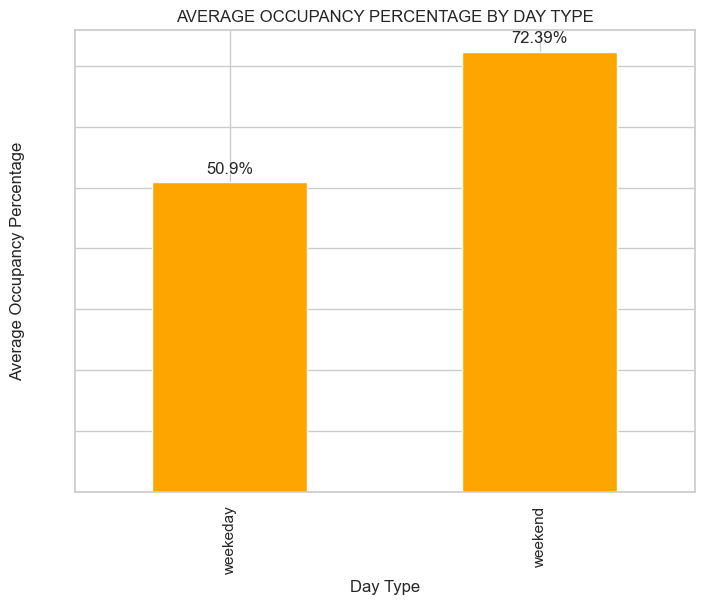

In [61]:
#STEP-3--Visualization:
sns.set(style="whitegrid")  # Set Seaborn style
plt.figure(figsize=(8, 6))
ax=df.groupby('day_type')['occ_pct'].mean().round(2).plot(kind='bar',color='orange')

yticks = ax.get_yticks()
yticklabels = []

for x in yticks:
    yticklabels.append('{}%'.format(int(x)))

ax.set_yticklabels(yticklabels,color='white')

for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('AVERAGE OCCUPANCY PERCENTAGE BY DAY TYPE')
plt.xlabel('Day Type')
plt.ylabel('Average Occupancy Percentage')
#Weekend occupancy is more.

In [63]:
#QUESTION-4:SHOW THE MONTHLY OCCUPANCY RATES FOR DIFFERENT MONTHS.
#First,check the number of months we have in out data,
df_date['mmm yy'].unique()
#we have data for may,2022 to july,2022.

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [100]:
#Step-1--

df_citywise_occupancy_per_month = df.groupby(['mmm yy', 'city'])['occ_pct'].mean().round(2).sort_values(ascending=False)
print(df_citywise_occupancy_per_month)

mmm yy  city     
Jun 22  Delhi        62.47
May 22  Delhi        59.65
Jul 22  Delhi        59.18
Jun 22  Hyderabad    58.46
        Mumbai       58.38
May 22  Hyderabad    57.06
        Mumbai       56.80
Jun 22  Bangalore    56.58
Jul 22  Hyderabad    55.36
May 22  Bangalore    55.28
Jul 22  Mumbai       55.24
        Bangalore    54.07
Name: occ_pct, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_10580\1837008853.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels,color='white')


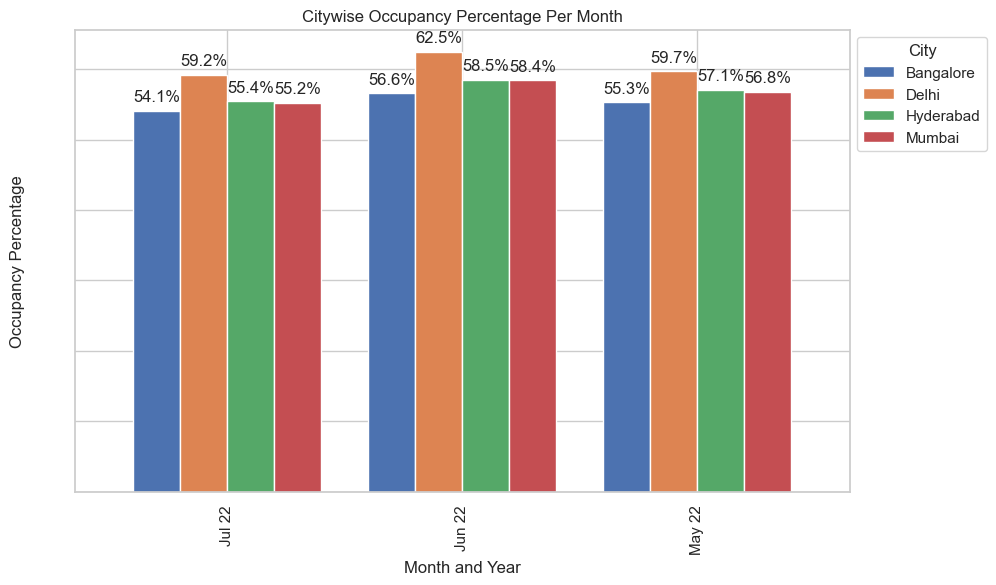

In [106]:
#STEP-2--
#Create the visual:
sns.set(style="whitegrid")
df_citywise_occupancy_per_month = df.groupby(['mmm yy', 'city'])['occ_pct'].mean().round(1).unstack()

ax = df_citywise_occupancy_per_month.plot(kind='bar', stacked=False, figsize=(10, 6), width=0.8)

# Add '%' to y-axis tick labels
yticks = ax.get_yticks()
yticklabels = []

for x in yticks:
    yticklabels.append('{}%'.format(int(x)))

ax.set_yticklabels(yticklabels,color='white')

# Add data labels to each column with rounded values
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.1f}%'.format(height), (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add title and labels
plt.title('Citywise Occupancy Percentage Per Month')
plt.xlabel('Month and Year')
plt.ylabel('Occupancy Percentage')

# Add legend
ax.legend(title='City', loc='upper left', bbox_to_anchor=(1, 1))

In [ ]:
#Conclusion: 
#1.As we can see In all three months,Delhi shows highest level of room occupancy.
#2.Hyderabad and Mumbai hotels doesn't show much difference in monthly occupancy rate.
#3.bangalore has least occupancy rate among all the cities throughout all three months.

In [279]:
#QUESTION:5--Your business manager has given you a new DataFrame for August month,combine it with the existing DataFrame to update the DataFrame.
#Concatinate the new DataFrame with the existing df_month dataframe.
#First check the column counts and columns are same or not since that is the first criteria of concatinaion:
df_august=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\new_data_august.csv')
df_august
#check the columns:
print(df_august.columns)
print(df.columns)
#same columns.

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [130]:
#Concatinate the New august DataFrame with df DataFrame.
updated_df=pd.concat([df,df_august],ignore_index=True,axis=0)
updated_df.tail(20)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6487,19559,31-Jul-22,RT4,2,3.0,66.67,RT4,Presidential,Atliq Exotica,Luxury,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6488,19561,31-Jul-22,RT1,21,36.0,58.33,RT1,Standard,Atliq Blu,Luxury,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6489,19561,31-Jul-22,RT2,24,45.0,53.33,RT2,Elite,Atliq Blu,Luxury,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6490,19561,31-Jul-22,RT3,18,29.0,62.07,RT3,Premium,Atliq Blu,Luxury,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6491,19561,31-Jul-22,RT4,4,7.0,57.14,RT4,Presidential,Atliq Blu,Luxury,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6492,17564,31-Jul-22,RT1,8,16.0,50.00,RT1,Standard,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6493,17564,31-Jul-22,RT2,19,40.0,47.50,RT2,Elite,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6494,17564,31-Jul-22,RT3,11,24.0,45.83,RT3,Premium,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,17564,31-Jul-22,RT4,10,17.0,58.82,RT4,Presidential,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,18560,31-Jul-22,RT1,22,30.0,73.33,RT1,Standard,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN


In [166]:
#QUESTION:6--Show the trend in successful_bookings in august in each city.
#STEP-1--#Find average bookings for August and merge the data with updated_df.
bookings_august=pd.merge(updated_df,updated_df[updated_df['mmm yy']=='Aug-22']['successful_bookings'])
bookings_august.tail(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
1279,18561,31-Jul-22,RT2,30,40.0,75.0,RT2,Elite,Atliq Blu,Luxury,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
1280,16559,01-Aug-22,RT1,30,30.0,NaN,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.0
1281,16559,01-Aug-22,RT1,30,30.0,NaN,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.0
1282,19558,01-Aug-22,RT1,30,40.0,NaN,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.0
1283,19558,01-Aug-22,RT1,30,40.0,NaN,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.0


In [160]:
#STEP-2--Find the citywise booking trend:
trend_data = bookings_august.groupby('city')['successful_bookings'].mean().round(1)
trend_data

city
Bangalore    18.5
Delhi        16.7
Hyderabad    17.7
Mumbai       17.8
Name: successful_bookings, dtype: float64

Text(0, 0.5, 'Mean Successful Bookings')

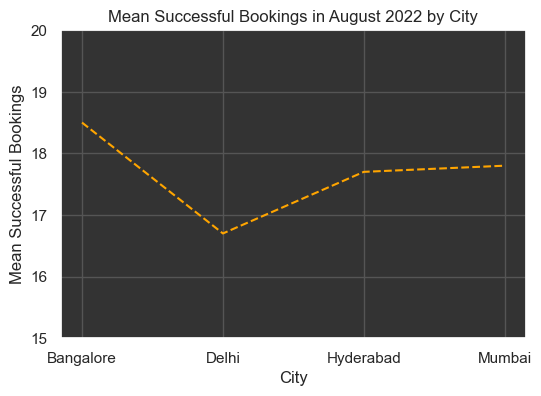

In [176]:
#STEP-3-- Create the trendline:

sns.set(style="whitegrid")

# Create a line plot
sns.set(style="darkgrid", rc={"axes.facecolor": "#333333", "grid.color": "#555555"})

plt.figure(figsize=(6, 4))
sns.lineplot(x=trend_data.index, y=trend_data.values,linestyle='dashed',color='orange')
plt.ylim(15, 20)
# Add title and labels
plt.title('Mean Successful Bookings in August 2022 by City')
plt.xlabel('City')
plt.ylabel('Mean Successful Bookings')

In [359]:
#QUESTION:7--
#Calculate the revenue realized per city.
#Revenue realized is in df_bookings DataFrame and city information is in df_hotels,so,we can join them:
#STEP-1--
#Joining the tables/DataFrames:
df_bookings_all=pd.merge(df_bookings,df_hotels,on='property_id')
df_bookings_all

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [201]:
#STEP-2--
#Group by city and sum the revenue realized.
revenue_realized_in_mln=((df_bookings_all.groupby('city')['revenue_realized'].sum())/1e6).round(2)
revenue_realized_in_mln

city
Bangalore    420.40
Delhi        294.50
Hyderabad    325.23
Mumbai       668.64
Name: revenue_realized, dtype: float64

Text(0, 0.5, 'City')

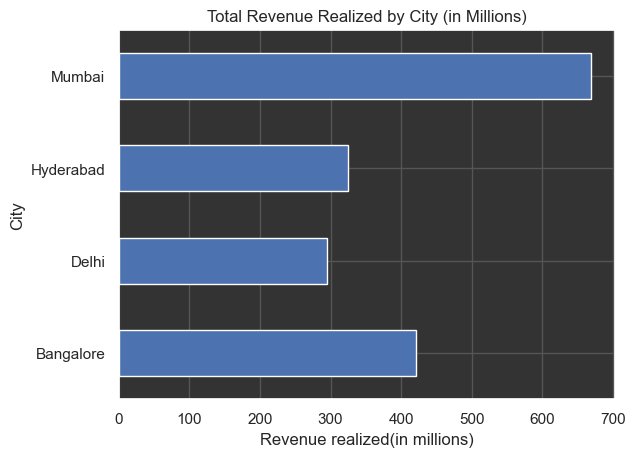

In [210]:
#STEP-3--
#Create the visualization:
revenue_realized_in_mln=((df_bookings_all.groupby('city')['revenue_realized'].sum())/1e6).round(2).plot(kind='barh')
plt.title('Total Revenue Realized by City (in Millions)')
plt.xlabel('Revenue realized(in millions)')
plt.ylabel('City')

In [211]:
#Conclusion:
#Delhi has seen highest level of occupancy rate as well as least revenue realized,means,the number of cancelled bookings in Delhi hotels are least.
#Mumbai has seen the highest amount of revenue realized,means the most number of cancelled bookings were done in Mumbai.

In [360]:
#QUESTION:8--
#Calculate the month by month revenue.
#The revenue generated on the check in date,so,the check in date of updated_df will be joined with the date column of df_date.
#But,
df_bookings_all.info()

#By doing careful observation we see thecheck in date column is object datatype,we need to convert them to proper datetype.
#..Otherwise we can't join it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
 12  property_name      134590 non-null  object 
 13  category           134590 non-null  object 
 14  city               134590 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [363]:
#STEP-1--Converting the "check_in_date" column to datetime.
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], errors='coerce')
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,2022-01-05,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,2022-01-05,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,2022-01-05,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [364]:
#STEP-2--Merging with date column.
#Please note: Running this cell repeatedly will cause data addition of date table each time.
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [382]:
#STEP-3-- Calculating the Revenue generated:
revenue_generated=df_bookings_all.groupby('mmm yy')['revenue_generated'].sum()
revenue_generated

mmm yy
Jul 22    71526945
Jun 22    62310255
May 22    71647470
Name: revenue_generated, dtype: int64

Text(0, 0.5, 'Revenue generated (in Million)')

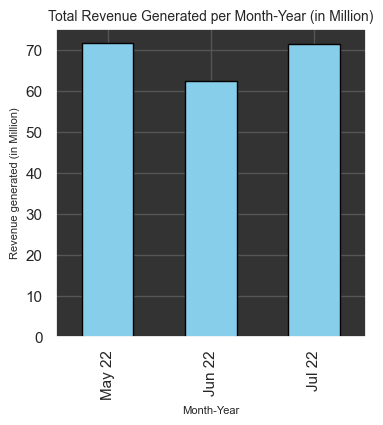

In [396]:
#STEP-4--Creating the visual:
revenue_generated_in_mln=(df_bookings_all.groupby('mmm yy')['revenue_generated'].sum()/1e6).round(1)
revenue_generated_in_mln=revenue_generated_in_mln.sort_index(ascending=False)
ax = revenue_generated_in_mln.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(4, 4))
plt.title('Total Revenue Generated per Month-Year (in Million)', fontsize=10)

# Adding labels
plt.xlabel('Month-Year', fontsize=8)
plt.ylabel('Revenue generated (in Million)', fontsize=8)